In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [2]:
df = pd.read_csv("challenge.csv")

In [31]:
df.shape

(1111742, 30)

In [3]:
df.head(5)

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111741 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111741 non-null  int64  
 1   Id               1111741 non-null  object 
 2   groupId          1111741 non-null  object 
 3   matchId          1111741 non-null  object 
 4   assists          1111741 non-null  int64  
 5   boosts           1111741 non-null  int64  
 6   damageDealt      1111741 non-null  float64
 7   DBNOs            1111741 non-null  int64  
 8   headshotKills    1111741 non-null  int64  
 9   heals            1111741 non-null  int64  
 10  killPlace        1111741 non-null  int64  
 11  killPoints       1111741 non-null  int64  
 12  kills            1111741 non-null  int64  
 13  killStreaks      1111741 non-null  int64  
 14  longestKill      1111741 non-null  float64
 15  matchDuration    1111741 non-null  int64  
 16  matchType        1

In [50]:
df = df.dropna()

In [51]:
df.describe(include="all")

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111741e+06,1111741,1111741,1111741,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,...,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06
unique,NaN,1111741,870621,47950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,09e7b108807b15,14d6b54cdec6bc,7db80b78103e95,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,17,42,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.224361e+06,NaN,NaN,NaN,2.336740e-01,1.106656e+00,1.307365e+02,6.573617e-01,2.266490e-01,1.370349e+00,...,1.641785e-01,6.042148e+02,3.551187e-03,4.545073e+00,2.401099e-02,7.833659e-03,1.153283e+03,3.659688e+00,6.057071e+02,4.727868e-01
std,1.283879e+06,NaN,NaN,NaN,5.894031e-01,1.716051e+00,1.711756e+02,1.146023e+00,6.033359e-01,2.683820e+00,...,4.704190e-01,1.495950e+03,7.385455e-02,3.061858e+01,1.678910e-01,9.194626e-02,1.182788e+03,2.461803e+00,7.395141e+02,3.073771e-01
min,6.000000e+00,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223770e+06,NaN,NaN,NaN,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337955e+06,NaN,NaN,NaN,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,...,0.000000e+00,7.940000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01


In [52]:
df.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [53]:
df.Id.value_counts()

09e7b108807b15    1
176d6c20f7f6ef    1
08c70d9ac44882    1
3d605492320c90    1
a3877b1c297335    1
                 ..
211845477d7610    1
c722a90595c36d    1
453e811f0cc71e    1
9397dc134fcbec    1
4879ff946b1604    1
Name: Id, Length: 1111741, dtype: int64

In [54]:
df.kills.value_counts()

0     632148
1     232156
2     118274
3      58026
4      31302
5      16600
6       9429
7       5458
8       3139
9       1934
10      1131
11       713
12       451
13       283
14       199
15       126
16        78
17        61
18        53
19        29
21        27
20        24
22        22
23        17
24        11
26         9
30         5
25         3
40         3
33         3
38         3
27         3
36         2
37         2
39         2
29         2
32         1
47         1
56         1
55         1
53         1
50         1
41         1
44         1
42         1
28         1
35         1
34         1
72         1
Name: kills, dtype: int64

In [55]:
df.weaponsAcquired.value_counts()

2      192607
3      191969
4      172227
1      145307
5      135438
        ...  
68          1
65          1
53          1
61          1
177         1
Name: weaponsAcquired, Length: 75, dtype: int64

In [56]:
df.DBNOs.value_counts()

0     693672
1     246032
2      98430
3      40535
4      17270
5       7945
6       3818
7       1822
8        917
9        516
10       239
11       172
12       111
13        71
15        42
14        39
16        21
18        21
17        18
21         8
23         8
19         7
20         7
22         7
25         4
24         3
33         2
27         1
28         1
32         1
35         1
Name: DBNOs, dtype: int64

In [57]:
df.groupby("kills")['assists'].sum()

kills
0     73281
1     61826
2     42376
3     28138
4     18557
5     12123
6      7825
7      4996
8      3176
9      2088
10     1391
11      969
12      626
13      481
14      299
15      262
16      217
17      169
18      128
19      123
20       92
21      103
22       90
23       75
24       39
25       14
26       62
27       12
28        6
29        7
30       37
32       15
33       30
34        2
35        3
36       12
37       17
38       15
39       13
40        4
41        9
42       13
44        8
47        9
50        2
53       11
55       12
56       15
72        7
Name: assists, dtype: int64

In [58]:
df['winPlacePerc'].unique()

array([0.0667, 0.5862, 0.8105, ..., 0.3971, 0.2115, 0.2899])

In [59]:
print(df.dtypes)

Unnamed: 0           int64
Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object


In [60]:
df_group_one = df[['Id','weaponsAcquired','kills','longestKill','teamKills','killPoints','winPlacePerc','rankPoints','winPoints']]

In [61]:
df_group_one

,Id,weaponsAcquired,kills,longestKill,teamKills,killPoints,winPlacePerc,rankPoints,winPoints
0,a3e3cea9f2e314,1,0,0.000,0,1437,0.0667,-1,1525
1,43e4be7ad72cc7,7,0,0.000,0,1225,0.5862,-1,1516
2,9a68690e31fdff,7,0,0.000,0,0,0.8105,1516,0
3,b147e1bd448fc4,0,0,0.000,0,1286,0.5556,-1,1515
4,d818b4edd59612,5,1,7.737,0,0,0.6429,1482,0
...,...,...,...,...,...,...,...,...,...
1111737,43739241d6a8e8,2,0,0.000,0,0,0.3929,1472,0
1111738,d57c8a22a9e38b,7,2,179.600,0,0,0.8542,1508,0
1111739,c7ad131758ba55,1,1,2.804,0,0,0.7174,1494,0
1111740,8237d06ea2c508,4,0,0.000,1,0,0.9000,1627,0


In [62]:
df_group_one = df_group_one.groupby(['kills'],as_index=False).mean()
df_group_one

,kills,weaponsAcquired,longestKill,teamKills,killPoints,winPlacePerc,rankPoints,winPoints
0,0,3.074721,0.000000,0.020824,487.177397,0.370283,889.029972,601.870608
1,1,3.919175,32.815620,0.023700,511.671100,0.514343,891.853581,608.592774
2,2,4.450606,52.038996,0.034065,525.528552,0.617425,897.852740,609.513038
3,3,4.887895,71.671043,0.034381,542.618998,0.704452,901.954262,612.950246
4,4,5.191074,89.444712,0.032362,552.556194,0.771160,910.150374,611.813430
5,5,5.511024,104.764212,0.026687,569.177892,0.823998,911.264759,619.996988
6,6,5.744193,118.321777,0.024393,581.233959,0.858372,919.124297,620.231732
7,7,5.939172,128.788617,0.019787,577.295163,0.882553,932.427629,610.634848
8,8,6.186047,143.154261,0.019114,566.704683,0.895573,950.169481,597.486779
9,9,6.677870,146.265914,0.024819,618.649948,0.901924,903.786453,648.059462


In [63]:
df_gptest = df[['killPoints','winPlacePerc','rankPoints','winPoints']]
grouped_test1 = df_gptest.groupby(['killPoints','winPoints'],as_index=False).mean()
grouped_test1

,killPoints,winPoints,winPlacePerc,rankPoints
0,0,0,0.473102,1494.477694
1,138,662,0.000000,-1.000000
2,142,530,0.000000,-0.500000
3,142,655,0.000000,-1.000000
4,165,610,0.000000,-1.000000
...,...,...,...,...
126838,2083,1672,0.571400,-1.000000
126839,2087,1648,0.462900,-1.000000
126840,2112,1706,1.000000,-1.000000
126841,2115,1693,1.000000,-1.000000


In [64]:
grouped_pivot = grouped_test1.pivot(index='killPoints',columns='winPoints')
grouped_pivot


winPlacePerc                                               ...  \
winPoints          0    328  330  341  344  345  346  348  349  354   ...   
killPoints                                                            ...   
0              0.473102  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
138                 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
142                 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
165                 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
167                 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
...                 ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2083                NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2087                NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2112                NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2115                NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2170                NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   

           rankPoints                                               
winPoints        1960 1961 1963 1967 1970 1983 1995 1996 1999 2002  
killPoints                                                          
0                 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
138               NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
142               NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
165               NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
167               NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...               ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
2083              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2087              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2112              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2115              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2170              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[1489 rows x 2320 columns]

In [65]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

winPlacePerc                                               ...  \
winPoints          0    328  330  341  344  345  346  348  349  354   ...   
killPoints                                                            ...   
0              0.473102  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
138            0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
142            0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
165            0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
167            0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
...                 ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2083           0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2087           0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2112           0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2115           0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2170           0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

           rankPoints                                               
winPoints        1960 1961 1963 1967 1970 1983 1995 1996 1999 2002  
killPoints                                                          
0                 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
138               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
142               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
165               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
167               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...               ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
2083              0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2087              0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2112              0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2115              0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2170              0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1489 rows x 2320 columns]

In [66]:
corr = df.corr()

In [67]:
corr.style.background_gradient(cmap ='coolwarm')

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Unnamed: 0,1.000000,0.001488,0.000571,-0.000012,-0.000260,0.001354,-0.000650,0.000105,0.000052,0.000249,-0.000256,0.001358,-0.000412,-0.001336,-0.001358,-0.000244,-0.000484,0.000628,0.000200,0.000796,0.000071,-0.000483,-0.000273,-0.000136,0.000043,-0.000144
assists,0.001488,1.000000,0.306582,0.409369,0.302200,0.199487,0.228456,-0.289985,0.038331,0.322067,0.243386,0.260407,-0.019401,-0.147629,-0.146553,-0.015586,0.197938,0.110496,0.012366,0.022871,0.007775,0.058241,0.288579,0.244594,0.023340,0.297738
boosts,0.000571,0.306582,1.000000,0.519600,0.357902,0.331536,0.535387,-0.554047,0.008992,0.499478,0.403484,0.421444,0.071469,-0.013298,-0.012530,0.022660,0.254125,0.329281,0.033775,0.107880,0.014645,0.085997,0.639361,0.405301,-0.006973,0.633482
damageDealt,-0.000012,0.409369,0.519600,1.000000,0.735084,0.613306,0.341620,-0.676136,0.050217,0.889038,0.703222,0.561656,-0.007610,-0.041204,-0.040571,-0.001614,0.256318,0.139840,0.050660,0.037509,0.016209,0.079900,0.396620,0.354514,0.017989,0.438973
DBNOs,-0.000260,0.302200,0.357902,0.735084,1.000000,0.467393,0.265348,-0.554860,0.042138,0.706211,0.646344,0.449521,-0.014083,-0.267303,-0.265377,-0.002738,0.301098,0.101882,0.035705,0.018726,0.071295,0.059857,0.284050,0.217667,0.010482,0.279322
headshotKills,0.001354,0.199487,0.331536,0.613306,0.467393,1.000000,0.197936,-0.468080,0.024202,0.673739,0.513207,0.444803,-0.018889,0.008062,0.008235,0.005047,0.149131,0.076274,0.011974,0.029987,0.009198,0.039857,0.249591,0.215612,0.005029,0.276170
heals,-0.000650,0.228456,0.535387,0.341620,0.265348,0.197936,1.000000,-0.385498,-0.001991,0.310537,0.268948,0.262337,0.107886,-0.064127,-0.063574,0.018507,0.236400,0.297734,0.023416,0.080991,0.035847,0.062720,0.429283,0.308228,-0.010303,0.427296
killPlace,0.000105,-0.289985,-0.554047,-0.676136,-0.554860,-0.468080,-0.385498,1.000000,-0.023595,-0.728968,-0.809671,-0.539513,-0.004889,0.015850,0.017791,-0.014798,-0.270057,-0.236372,-0.057496,-0.089924,-0.039589,-0.072698,-0.590132,-0.489745,-0.002612,-0.719051
killPoints,0.000052,0.038331,0.008992,0.050217,0.042138,0.024202,-0.001991,-0.023595,1.000000,0.036511,0.037883,0.013884,-0.098799,-0.044097,-0.041700,-0.975461,0.012730,-0.027882,-0.004503,-0.005820,-0.039932,-0.009321,0.004882,-0.004247,0.983443,0.013089
kills,0.000249,0.322067,0.499478,0.889038,0.706211,0.673739,0.310537,-0.728968,0.036511,1.000000,0.802054,0.600461,-0.031484,-0.005442,-0.004645,0.007880,0.253222,0.114664,0.061824,0.039986,0.019248,0.078644,0.373495,0.338190,0.007204,0.418527


<AxesSubplot:>

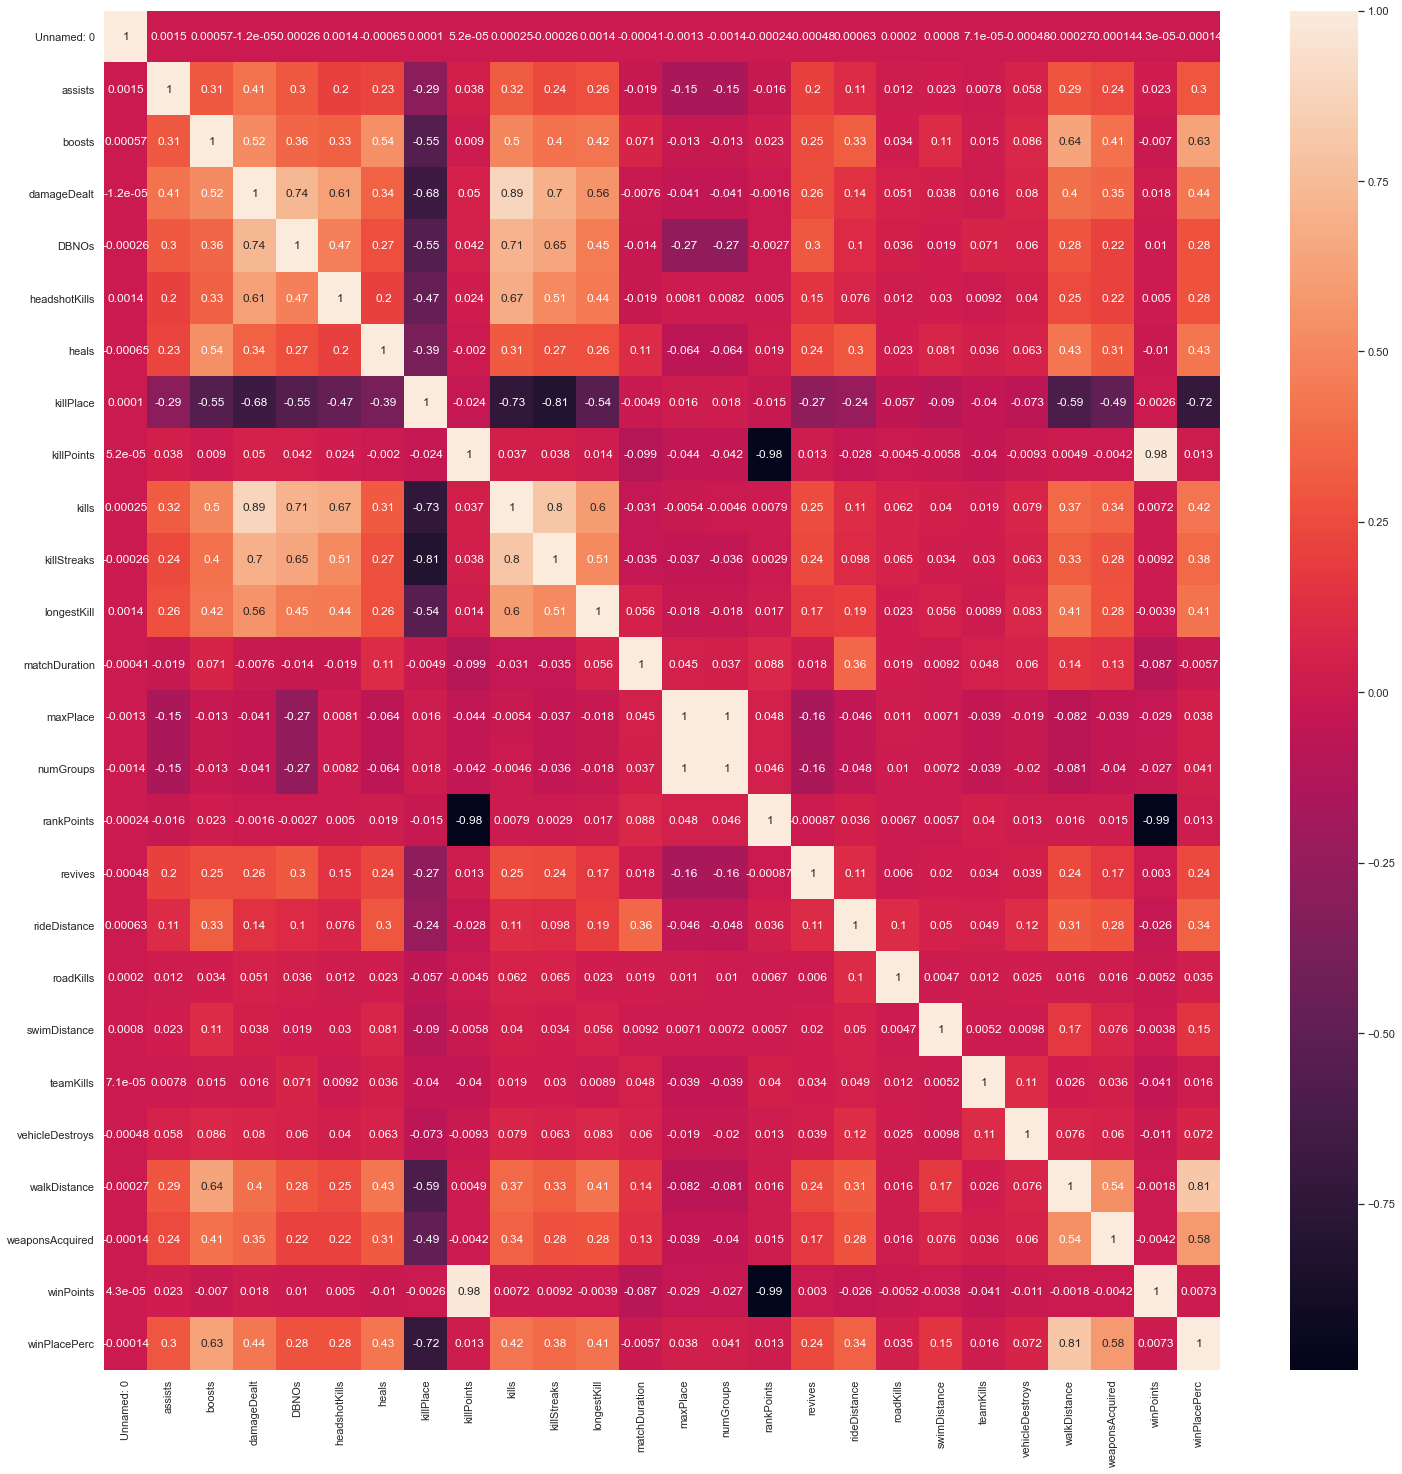

In [68]:
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot = True)

**Univariate analysis**

<AxesSubplot:xlabel='boosts', ylabel='kills'>

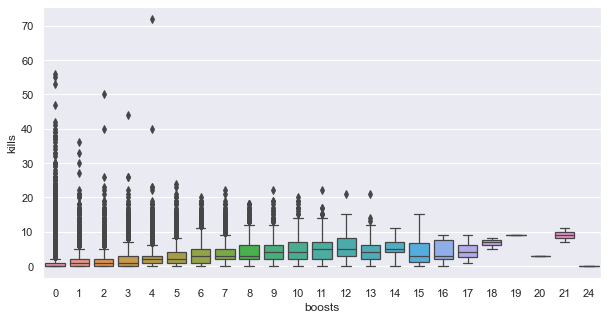

In [69]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["boosts"],y=df["kills"],width=0.8,linewidth=1.25)

**There are many outliers in kills compared to boosts**

<AxesSubplot:xlabel='kills', ylabel='killPoints'>

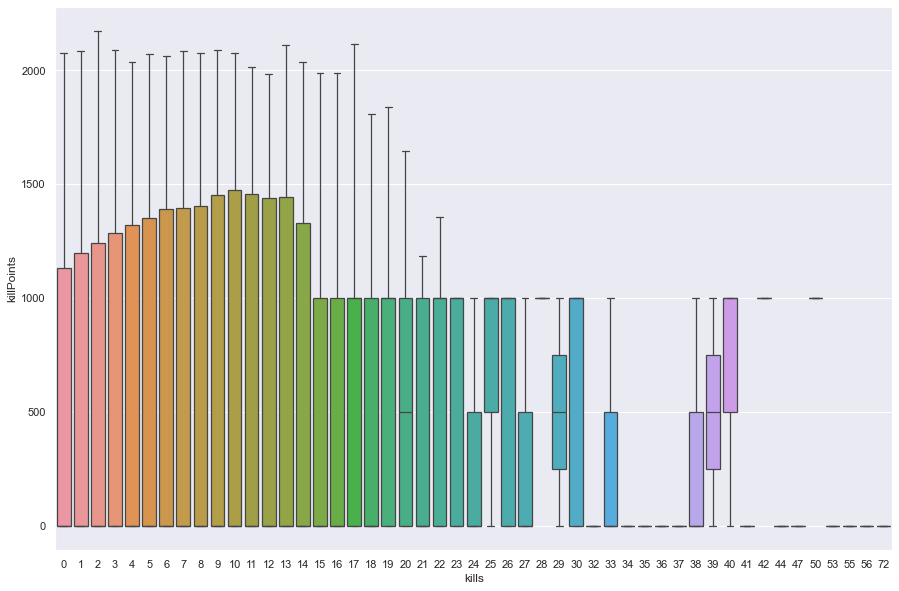

In [70]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df["kills"],y=df["killPoints"],width=0.8,linewidth=1.25)

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df["kills"],y=df["winPoints"],width=0.8,linewidth=1.25)